In [2]:
import os
import argparse
import json
import cv2
from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from keras.models import load_model
from tqdm import tqdm
import numpy as np
import time
import matplotlib.pyplot as plt



###############################
#   Load the model
###############################
#os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model('webcam.h5')


labels  =["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck","boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
         "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", 
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator","book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
   

Using TensorFlow backend.
/home/dlsaavedra/anaconda3/envs/model/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


processing time:  0.6773781776428223


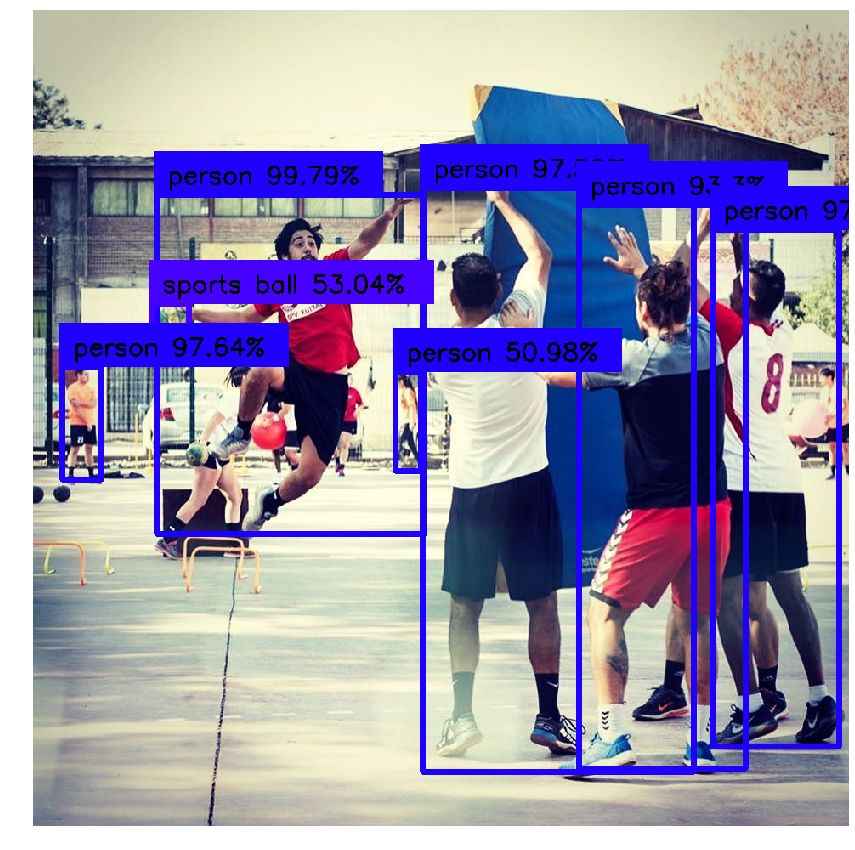

In [7]:
anchors =  [10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326]
net_h, net_w = 320, 320 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45
image = cv2.imread('Prueba_2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


start = time.time()
# predict the bounding boxes
boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]

# draw bounding boxes on the image using labels
draw_boxes(image, boxes, labels, obj_thresh) 
print("processing time: ", time.time() - start)
# write the image with bounding boxes to file
  
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
video_reader = cv2.VideoCapture(0)

# the main loop
batch_size  = 1
images      = []
while True:
    ret_val, image = video_reader.read()
    if ret_val == True: images += [image]
    cv2.imshow('video with bboxes', image)
    batch_boxes = get_yolo_boxes(infer_model, images, net_h, net_w, anchors, obj_thresh, nms_thresh)
    draw_boxes(image, batch_boxes[0], labels, obj_thresh) 
    #if (len(images)==batch_size) or (ret_val==False and len(images)>0):
     #   batch_boxes = get_yolo_boxes(infer_model, images, net_h, net_w, anchors, obj_thresh, nms_thresh)

        #for i in range(len(images)):
            #draw_boxes(images[i], batch_boxes[i], labels, obj_thresh) 
            #cv2.imshow('video with bboxes', images[i])
        
    images = []
    if cv2.waitKey(1) == 27: 
        break  # esc to quit
cv2.destroyAllWindows()        

In [ ]:
cv2.destroyAllWindows()  